# Capstone 3

Sheet 1. 
1. Data Wrangling- Analyzed trends in Reddit WallStreetBets Posts
Sheet 2. 
2. NLP of posts/ 3. Converting Emoji's to meanings
Sheet 3. 
4. Predict stock movement/ 5. Visualizing The Stock Data
4. Modeling
5. Sentiment analysis/ Predict stock movement based on sentiment/ logistic modeling

Analyzed trends in Reddit WallStreetBets Posts, to predict trends and stock picks. Specifically historical stock data for  Google, Gold, AMC, Bitcoin, GameStop. Used unsupervised data, Natural Language Processing, sentiment analysis, topic modeling, Tableau, and Web Scraping. 

created a predicive model that predicts whether a stock will go up or down. A classfication model that specifies where the movement is up or down. label encoder sentiment words into numbers to predict up or down- run through any classficiation model

Create a new dataframe, with columns; make time of post, put price, day, and sentiment, and compare sentiment on one row and price on another row. We're looking to see which words affect which stock goes up and which goes down. 

Predict, error/ loss, train — do for all projects

In [3]:
#had to install worldcloud
import sys
print(sys.executable)

C:\dev\python.exe


In [1]:
#Install packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.corpus import subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import string
%matplotlib inline
import nltk
from nltk.stem import WordNetLemmatizer 
import matplotlib.ticker as ticker

wall = pd.read_csv('reddit_wsb.csv')

C:\dev\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to C:\Users\Allegra
[nltk_data]     Grunberg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Allegra
[nltk_data]     Grunberg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Wrangling

In [6]:
#check the head 
wall.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [4]:
#check info 
wall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      37155 non-null  object 
 1   score      37155 non-null  int64  
 2   id         37155 non-null  object 
 3   url        37155 non-null  object 
 4   comms_num  37155 non-null  int64  
 5   created    37155 non-null  float64
 6   body       18718 non-null  object 
 7   timestamp  37155 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


In [5]:
#check data types 
wall.select_dtypes('object')

,title,id,url,body,timestamp
0,"It's not about the money, it's about sending a...",l6ulcx,https://v.redd.it/6j75regs72e61,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,l6uibd,https://v.redd.it/ah50lyny62e61,NaN,2021-01-28 21:32:10
2,Exit the system,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,l6ugk6,https://sec.report/Document/0001193125-21-019848/,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,NaN,2021-01-28 21:26:56
...,...,...,...,...,...
37150,Could use some help here at the end of the day...,lt4i4u,https://i.redd.it/1rhnimof9vj61.jpg,NaN,2021-02-27 04:37:32
37151,The war has just begun,lt4fk0,https://v.redd.it/fcyia2xo8vj61,NaN,2021-02-27 04:34:21
37152,PSA: AMCX is not up because of AMC,lt4ci5,https://www.reddit.com/r/wallstreetbets/commen...,Tl;dr AMCX is a very undervalued company based...,2021-02-27 04:30:42
37153,Ape Combat 6: Liberation of Gamestopmeria,lt46qn,https://v.redd.it/x6b005am5vj61,NaN,2021-02-27 04:23:42


In [6]:
#look at all posts with "NaN" see if you should remove them
wall.isnull().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         18437
timestamp        0
dtype: int64

find out how percent of missing "body" data:
37155/18437 = 2.01524109128. This is almost half the data

In [8]:
#list 'score' column by desc
wall.sort_values(by='score', ascending=False)

,title,score,id,url,comms_num,created,body,timestamp
19162,Times Square right now,348241,l8rf4k,https://v.redd.it/x64z70f7eie61,11554,1.612058e+09,NaN,2021-01-31 04:00:38
16009,GME YOLO update — Jan 28 2021,225870,l78uct,https://i.redd.it/opzucppb15e61.png,23309,1.611897e+09,NaN,2021-01-29 07:06:23
17771,GME YOLO month-end update — Jan 2021,219779,l846a1,https://i.redd.it/r557em3t5ce61.png,20105,1.611983e+09,NaN,2021-01-30 07:04:45
34179,GME YOLO update — Feb 19 2021,201168,lnqgz8,https://i.redd.it/2xswz0h11ii61.png,12846,1.613798e+09,NaN,2021-02-20 07:05:55
18273,It’s treason then,195782,l881ia,https://i.redd.it/d3t66lv1yce61.jpg,4523,1.611992e+09,NaN,2021-01-30 09:40:59
...,...,...,...,...,...,...,...,...
23414,"Greatest transfer of wealth, you say",0,lbk4m0,https://www.reddit.com/r/wallstreetbets/commen...,25,1.612374e+09,To the hedge funds maybe.\n\nYou think that ho...,2021-02-03 19:43:51
35183,TC Energy (TRP.TO) making mad profits due to T...,0,lqzs0i,https://www.reddit.com/r/wallstreetbets/commen...,28,1.614160e+09,I will re-write this to r/WSB standards until ...,2021-02-24 11:42:18
31107,MPRT! Amazon partnership and still going for low!,0,ldoall,https://www.reddit.com/r/wallstreetbets/commen...,11,1.612609e+09,Any thoughts on it with the Amazon announcement?,2021-02-06 12:56:10
31108,CLOV is the New GME Change my mind! Hindenburg...,0,ldnk76,https://www.reddit.com/gallery/ldnk76,9,1.612606e+09,NaN,2021-02-06 12:14:50


Creating new columns for time and data from "timestamp" column

In [9]:
#Extract time from timestamp add an EST time column 
#resource- https://www.w3resource.com/python/python-date-and-time.php 
wall['Time'] = pd.DatetimeIndex(wall['timestamp']).time

#change time format to EST 
wall.head()

,title,score,id,url,comms_num,created,body,timestamp,Time
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,21:26:56


In [11]:
#Extract date from "timestamp" column and create "Date" column
wall['Date'] = pd.DatetimeIndex(wall['timestamp']).date
wall.head()

,title,score,id,url,comms_num,created,body,timestamp,Time,Date
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,21:37:41,2021-01-28
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,21:32:10,2021-01-28
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,21:30:35,2021-01-28
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,21:28:57,2021-01-28
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,21:26:56,2021-01-28


In [25]:
#check types of new features
wall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37155 entries, 0 to 37154
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      37155 non-null  object 
 1   score      37155 non-null  int64  
 2   id         37155 non-null  object 
 3   url        37155 non-null  object 
 4   comms_num  37155 non-null  int64  
 5   created    37155 non-null  float64
 6   body       18718 non-null  object 
 7   timestamp  37155 non-null  object 
 8   Time       37155 non-null  object 
 9   Date       37155 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.8+ MB


Changing all numeric data to float type

In [44]:
#https://stackoverflow.com/questions/43109167/converting-date-and-time-into-float-in-python/43109317
wall['Date'].replace('-', '').replace(':', '')

0        2021-01-28
1        2021-01-28
2        2021-01-28
3        2021-01-28
4        2021-01-28
            ...    
37150    2021-02-27
37151    2021-02-27
37152    2021-02-27
37153    2021-02-27
37154    2021-02-27
Name: Date, Length: 37155, dtype: object


In [43]:
wall['Time'].replace('-', '').replace(':', '')

0        21:37:41
1        21:32:10
2        21:30:35
3        21:28:57
4        21:26:56
           ...   
37150    04:37:32
37151    04:34:21
37152    04:30:42
37153    04:23:42
37154    04:25:09
Name: Time, Length: 37155, dtype: object

# EDA

In [34]:
#which features correlate, is there collinear features?
#make sure datetime data is properly changed to float64 and included. 

wall.corr().T

,score,comms_num,created
score,1.000000,0.199751,0.074560
comms_num,0.199751,1.000000,0.056829
created,0.074560,0.056829,1.000000


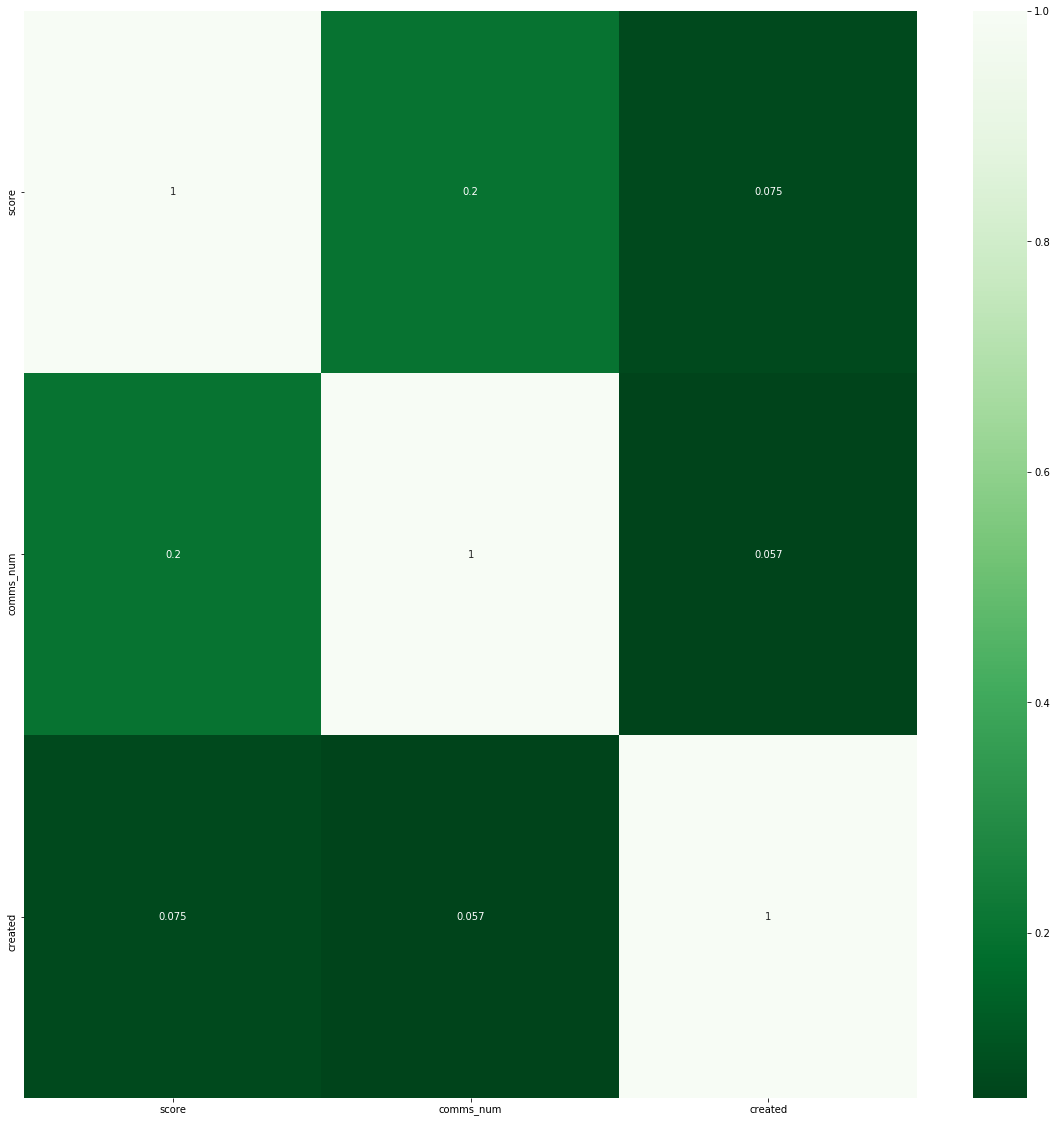

In [35]:
#visualize correlation of data

plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(wall.corr(), cmap = 'Greens_r', annot = True)

In [36]:
#Statistical Tests
wall.describe()

,score,comms_num,created
count,37155.000000,37155.000000,3.715500e+04
mean,1250.119526,169.005679,1.612355e+09
std,8299.838243,2189.722472,6.940441e+05
min,0.000000,0.000000,1.601340e+09
25%,1.000000,1.000000,1.611879e+09
50%,16.000000,9.000000,1.612060e+09
75%,142.000000,39.000000,1.612537e+09
max,348241.000000,89050.000000,1.614697e+09


# 1. Analyzed trends in Reddit WallStreetBets Posts

Understanding Frequency and Popularity

In [12]:
#iterate over 'title' find consistent topics and aggregate them 
#Use pandas' Series method `value_counts` to find any duplicated names

wall['title'].value_counts().head()

AMC              39
Robinhood        25
HOLD THE LINE    20
HOLD             16
NOK              15
Name: title, dtype: int64

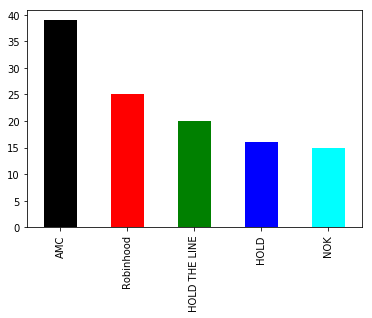

In [13]:
#Graph the most mentioned title 

wall['title'].value_counts().head().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan']);

In [14]:
#See which topics scored the highest, top 10 scores

top_10_score = wall.nlargest(10,['score'])
print(top_10_score)

                                                   title   score      id  \
19162                             Times Square right now  348241  l8rf4k   
16009                      GME YOLO update — Jan 28 2021  225870  l78uct   
17771               GME YOLO month-end update — Jan 2021  219779  l846a1   
34179                      GME YOLO update — Feb 19 2021  201168  lnqgz8   
18273                                  It’s treason then  195782  l881ia   
18069  Used some of my GME tendies to buy Nintendo Sw...  192980  l8c0u4   
32168                   Wow super bowl commercial for us  191380  lexy8t   
18230                              That’s what I thought  175665  l890i7   
16220                      IT'S POWER TO THE TRADERS NOW  174401  l7feld   
18826  I am proud to do my part in paying forward our...  171778  l90oq6   

                                                     url  comms_num  \
19162                    https://v.redd.it/x64z70f7eie61      11554   
16009                

In [2]:
#find the top 10 scored posts that have a "body"

top_10_score_body = wall.nlargest(10,['score'] & wall.nlargest(10,['body'!= 'NaN'])                            
print(top_10_score_body)                                  

SyntaxError: invalid syntax (<ipython-input-2-c5038d2299ab>, line 3)

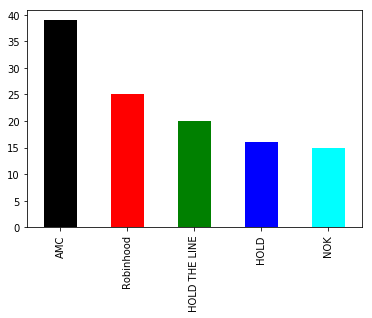

In [4]:
# Graph the top 10 posts with bodies of texts 

wall['title'].value_counts().head().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan']);

In [3]:
#frequency analysis of words in title using Word Cloud
#code from wallstreet project on kaggle
#my_stopwords

title_wc = WordCloud(stopwords = wall, background_color='white', collocations = False).generate('title')
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Title', fontsize = 20)
plt.axis('off')

ValueError: We need at least 1 word to plot a word cloud, got 0.

Save output

In [37]:
df.to_csv('output.csv')

NameError: name 'df' is not defined